# Estimating Burned Area Using RSensePy

This notebook introduces the biophyical index calculator, RSensePy, and guides users on how to calculate one of the increasingly available vegetation indices therein. Please substitue the input parameter (imagery, shapefile, e.t.c) where necessary.

## Section 1 

# Mapping Maui's Wildfires. 

Between August 7th and 9th, Hurricane Dora, a Category 4 storm, with max wind speeds above 130 miles per hour, passed by Hawaii. At approximatly 3:00am on August 8th, brush fire was reported in the Olinda Road area of Kula, an area in central Maui. Fueled by the severe storms from Dora, this fire as well as others like it would spring up across parts of West and Central Maui, raging on for 4 days. The aftermath would see over 100 people dead, an estimated 2200 building destroyed, and much of the touristic and economic hub of Lahaina, on the island’s western edge, reduced to ashes. 

The internet is filled with shpocking images of this devastation, mostly provided by on ground reporters and affected residents. Using Remote sening, by way of freely available Landsat 9 imagery, and the RSensePy biophysical Index calculator, we will now visulaize the damage caused especially in Lahaina, the area worst hit.

For more details on RSensePy and how to use it, please read the docs. (https://rsensepy.readthedocs.io/en/latest/installation.html)

In [6]:
pip install RSensePy==0.0.4

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for RSensePy==0.0.4 from https://files.pythonhosted.org/packages/b1/6c/9c7022cacaece5870ada3d0ab21ca1abfb6bf15ebca382b4710a757bac5e/RSensePy-0.0.4-py3-none-any.whl.metadata
  Attempting uninstall: RSensePy
    Found existing installation: RSensePy 0.0.3
    Uninstalling RSensePy-0.0.3:
      Successfully uninstalled RSensePy-0.0.3
Note: you may need to restart the kernel to use updated packages.


#### To check the installed version for RSensePy and pip. This ensures that you are using the latest versions available.

In [7]:
pip show RSensePy

Name: RSensePy
Version: 0.0.4
Summary: Biophysical parameter calculator for Sentinel 2 and Landsat 8,9 data
Home-page: https://github.com/richiedlon/SoftwareDevProject
Author: richiedlon/opeyami
Author-email: 
License: MIT
Location: c:\users\xeon\appdata\roaming\python\python39\site-packages
Requires: Fiona, geopandas, matplotlib, rasterio, shapely
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show pip

In [8]:
import RSensePy as rp

In [ ]:
before= rp.L8("C://test//LC08_L2SP_063046_20230807_20230812_02_T1")
after= rp.L8("C://test//LC09_L2SP_063046_20230815_20230817_02_T1")

#### Getting the image metadata is quite straightforward, just call the meta method.

In [ ]:
before.meta()

In [ ]:
after.meta()

#### From the metadata, we see the acquisition/sensing date for the before image is 7th of August, before the fire started, while the after image is acquired on the 15th of August after the fires have sucessfully been put out.

## Calculating Normalise Burn Ratio

To estimate recently burned areas, the most popular biophysical index used is teh Normalised Burn Ratio. This parameter uses the refelctance in the shortwave infrared and near infrared band of teh electromagnetic spectrum. These bands are sensitive to changes in vegetation health and burn severity. To calculate teh Normalised Burn Ratio, we call the .NBR function in RSensePy. 

Before that however, we must define an output file, and an AOI within which the analysis will be run. The AOI could be either the coordinates of a bounding box, or a shapefile created a-priori. In this case , we utilise the latter. 

Note: If the entire image is to be analysed, define the shapefile or bounding box to the size of the entire image.

In [ ]:
#set bounding box, within which the procesising and output will be clipped. 
#An alternative is to use a pre-existing shapefile

lahainashp= "C:/test/lahania.shp"
beforeNBR= "C:/test/output/beforeNBR.tif" #output folder should be created a-priori

#calling the NBR method to calculate the Normalied Burn Ratio.
before.NBR(cloud=True, save_location=beforeNBR, shp_location=lahainashp, visualise=True)

In [ ]:
afterNBR= "C:/test/output/afterNBR.tif"

#calling the NBR method to calculate the Normalied Burn Ratio.
after.NBR(cloud=True, save_location=afterNBR, shp_location=lahainashp, visualise=True)

#### To better visualise the actual extent of recently burned areas, we call the get_differnce function in RSensePy, which gives a difference between 2 input images. 

In [ ]:
diffNBR = "C:/test/output/diffNBR.tif"
rp.get_difference(savelocation=diffNBR, visualise=True, image1="C:/test/output/afterNBR.tif", image2="C:/test/output/beforeNBR.tif")

## Maui Results

According to UN-SPIDER guide on Burn area estimation (https://un-spider.org/advisory-support/recommended-practices/recommended-practice-burn-severity/in-detail/normalized-burn-ratio#:~:text=A%20high%20NBR%20value%20indicates,to%20values%20close%20to%20zero.), a high NBR value indicates healthy vegetation (areas in green) while a low value (areas in red) indicates bare ground and recently burnt areas. Non-burnt areas are normally attributed to values close to zero (areas in orange).

Going by the above, we can clearly see from the 'after' map the burned areas in Lahaina, Maui. The 'difference' map further confirms areas that where burned within the 7 days which fire raged. We can see the residential areas around Lahaina road severlly affected. This which corresponds to the images from news and social media, also corroborating this well mapped report (https://www.latimes.com/projects/maps-maui-fire-destroyed-lahaina-satellite/) by the LA Times. 

## Section 2

# Mapping Euboea's Wildfires

Rising global tempratures and geogrpahy makes Greece prone to severe heatwaves and wildfires. This chronic yearly phenomena continues to cause devastation across the country where tempratures constantly exceed 40 degrees celcius in the summer. 2023 is no exception with wildfires being reported since July. Over 80 fires have been recorded, with at least 35 dead as at August 2023. 

Similar situations were observed in 2021 as well, where Greece experience the worst wildfires since 2007. One of the areas chronicly affected Euboea(EVia), the second most populus island in Greece. More than a third of land area detroyed by the 2021 Greece wildfires were in Northern Euboea. We will now go on to visulaize this area using RSensepy and Sentinel 2 Imagery.

### To use Sentinel 2 imagery with RSensePy, it is important to check the following

* The imagery files are located within the current working directory
* The Sentinel 2 product folder contains only the relevant resolution folder (e.g. if 20m resolution is being used, delete the other 10 and 60 meter folders). 
or 
* Extract just the relevant resolution folder into a parent folder with the same name as the downloaded sentinel 2 product.

Also, Sentinel 2 cloud masking is not currently implememted. Therefore, it is adviced to use imagery with below 10% cloud cover as not to cause misleading results. The cloud masking implementation is currenlty underway and will be implemented soon.

In [ ]:
beforeS2 = rp.S2("C://test//S2B_MSIL2A_20210801T092029_N0301_R093_T34SFJ_20210801T114000.SAFE")
afterS2 = rp.S2("C://test//S2A_MSIL2A_20210925T092031_N0301_R093_T34SFJ_20210925T124522.SAFE")

In [ ]:
beforeS2.meta()

In [ ]:
afterS2.meta()

In [ ]:
Euboeashp= "C:/test/Euboea.shp"
beforeS2NBR= "C:/test/output/beforeS2NBR.tif" #output folder should be created a-priori

#calling the NBR method to calculate the Normalied Burn Ratio. Because there is no cloud masking implemented yet, this is not a required parameter in the S2 class
beforeS2.NBR(save_location=beforeS2NBR, shp_location=Euboeashp, visualise=True)

In [ ]:
afterS2NBR= "C:/test/output/afterS2NBR.tif" #output folder should be created a-priori

#calling the NBR method to calculate the Normalied Burn Ratio.
afterS2.NBR(save_location=afterS2NBR, shp_location=Euboeashp, visualise=True)

In [ ]:
diffS2NBR = "C:/test/output/diffS2NBR.tif"
rp.get_difference(savelocation=diffS2NBR, visualise=True, image1="C:/test/output/afterS2NBR.tif", image2="C:/test/output/beforeS2NBR.tif")

## Euboea Results

Going by the above results, we can clearly estimate the recently burned areas from the south eastern part of the 'difference' map. because of the nature of the coastal waters in this part of the world, there is strong sensitivity in the SWIR band, hence the sharp negative values in that region. This can be easily corrected by masking out the using the scene classifcation layer (https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/scene-classification/) that ships with sentinel 2 product. 

For more on that, please visit the reference tutorial from EUMETSAT (https://fire.trainhub.eumetsat.int/docs/figure2345_Sentinel-2.html).

## Section 3

# Test Code for all currently existing Indecies in RSensePy

 To get an  updated list of the currently available parameter run the getCapabilities function as below;
 ### rp.getCapabilities 

In [ ]:
rp.getCapabilities()

### For Landsat 8/9 Imagery

In [9]:
imageryL8 = rp.L8("C://test//LC08_L2SP_063046_20230807_20230812_02_T1")
shapefileL8 = "C:/test/lahania.shp"
testNDVI = "C:/test/output/testNDVI.tif"
testEVI = "C:/test/output/testEVI.tif"
testNDWI = "C:/test/output/testNDWI.tif"
testNDBI = "C:/test/output/testNDBI.tif"
testGNDVI = "C:/test/output/testGNDVI.tif"
testGLI = "C:/test/output/testGLI.tif"
testSAVI = "C:/test/output/testSAVI.tif"
testGSAVI = "C:/test/output/testGSAVI.tif"
testGCI = "C:/test/output/testGCI.tif"
testVARI = "C:/test/output/testVARI.tif"

cloudMask calculation completed
normDifVal calculation completed
Writing raster completed


C:\Users\xeon\AppData\Roaming\Python\Python39\site-packages\RSensePy\__init__.py:215: RuntimeWarning: invalid value encountered in true_divide
  normDifVal = numerator / denominator


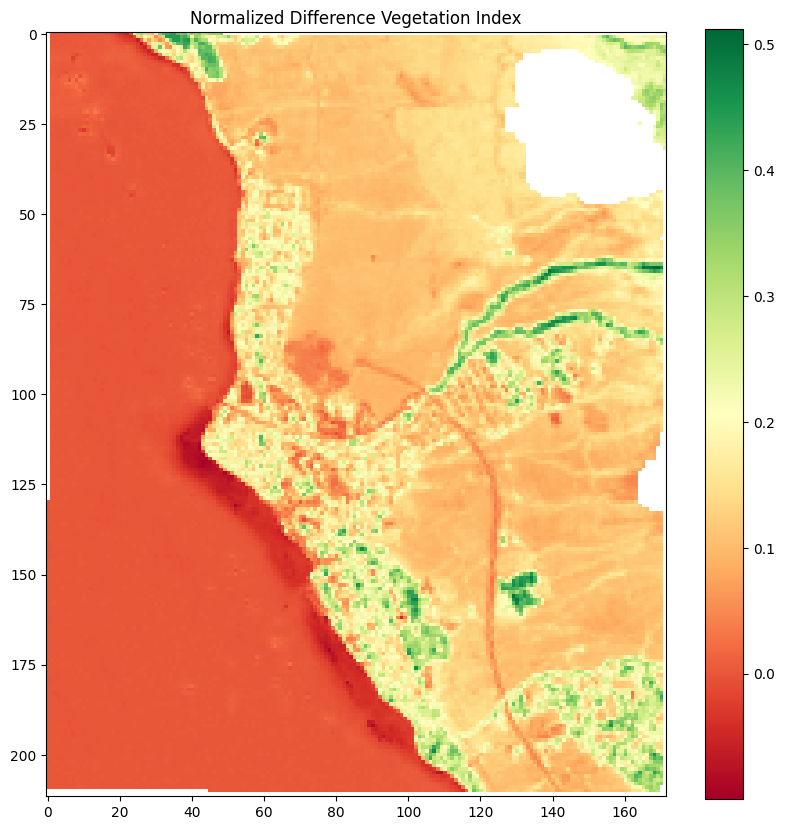

In [10]:
imageryL8.NDVI(cloud=True, save_location=testNDVI, shp_location=shapefileL8, visualise=True)

nir_clipped calculation completed
red_clipped calculation completed
blue_clipped calculation completed
cloudMask calculation completed
eviValue calculation completed
Writing raster completed


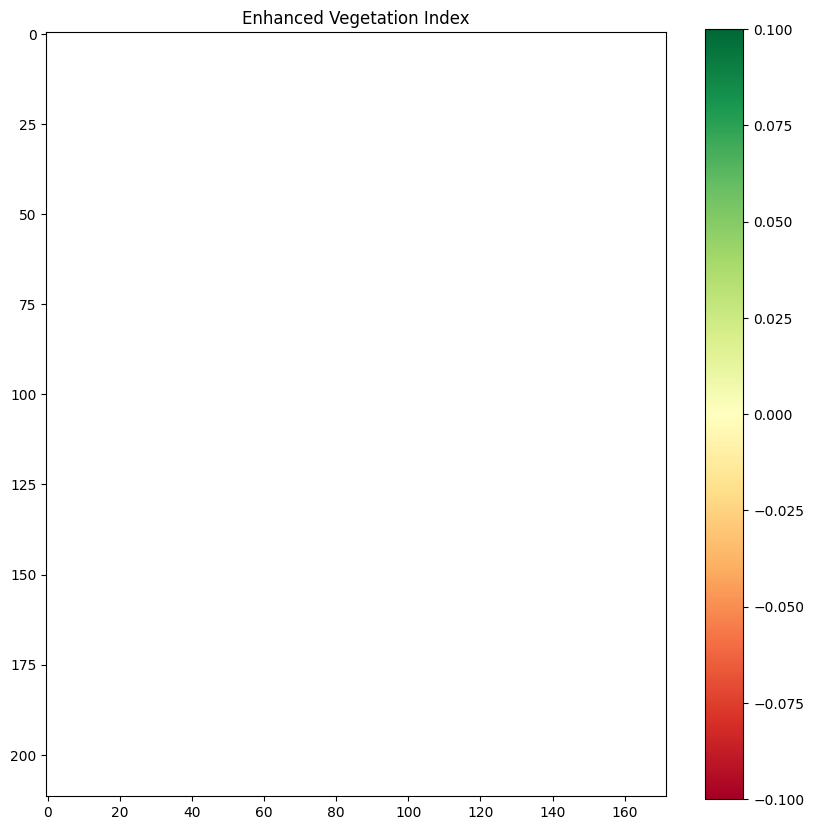

In [11]:
imageryL8.EVI(cloud=True, save_location=testEVI, shp_location=shapefileL8, visualise=True)
#The values may not dispaly here properly, but check the saved file to see the proper results.

In [ ]:
imageryL8.NDWI(cloud=True, save_location=testNDWI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.NDBI(cloud=True, save_location=testNDBI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.GNDVI(cloud=True, save_location=testGNDVI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.GLI(cloud=True, save_location=testGLI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.SAVI(cloud=True, save_location=testSAVI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.GSAVI(cloud=True, save_location=testGSAVI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.GCI(cloud=True, save_location=testGCI, shp_location=shapefileL8, visualise=True)

In [ ]:
imageryL8.VARI(cloud=True, save_location=testVARI, shp_location=shapefileL8, visualise=True)

### For Sentinel 2 Imagery

##### All the indices above can also be run for Sentinel 2 Imagery, plus 1 more. Since Landsat does not have the Red-Edge band, the Red-Edge Chlorophyll Index, is one bonus index that can be calculated using your Sentinel 2 imagery. Example below

In [16]:
imageryS2 = rp.S2("C://test//S2B_MSIL2A_20210801T092029_N0301_R093_T34SFJ_20210801T114000.SAFE")
shapefileS2 = "C:/test/Euboea.shp"
test2RECI = "C:/test/output/test2RECI.tif"
test2EVI = "C:/test/output/test2EVI.tif"

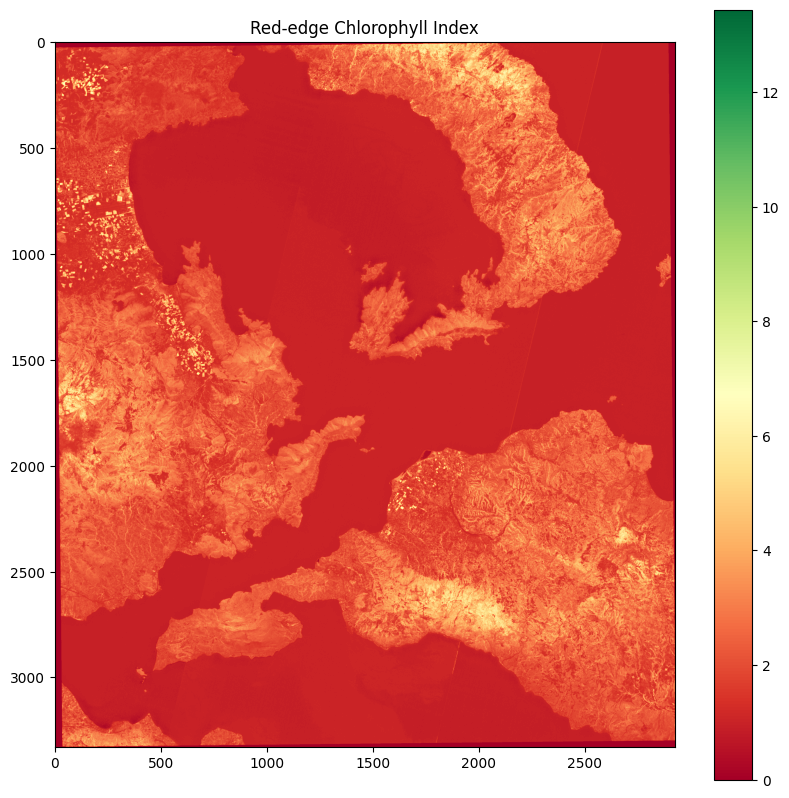

In [15]:
imageryS2.RECI(save_location=test2RECI, shp_location=shapefileS2, visualise=True)

C:\Users\xeon\AppData\Roaming\Python\Python39\site-packages\RSensePy\__init__.py:923: RuntimeWarning: divide by zero encountered in true_divide
  eviValue = G * ((nir - red)/(nir + C1 * red - C2 * blue + L))


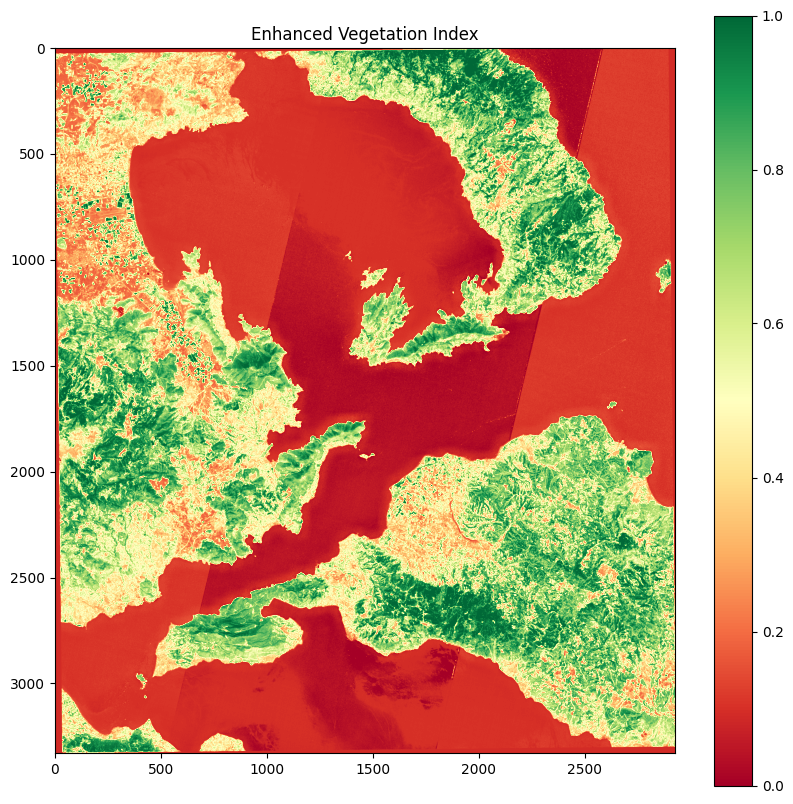

In [17]:
imageryS2.EVI(save_location=test2EVI, shp_location=shapefileS2, visualise=True)